# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | al ghayzah
Processing Record 2 of Set 1 | fale old settlement
Processing Record 3 of Set 1 | sitka
Processing Record 4 of Set 1 | longyearbyen
Processing Record 5 of Set 1 | tommot
Processing Record 6 of Set 1 | anadyr
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | xai-xai
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 11 of Set 1 | bilibino
Processing Record 12 of Set 1 | george town
Processing Record 13 of Set 1 | el calafate
Processing Record 14 of Set 1 | danjiangkou
Processing Record 15 of Set 1 | tura
Processing Record 16 of Set 1 | yellowknife
Processing Record 17 of Set 1 | kasaragod
Processing Record 18 of Set 1 | nuku'alofa
Processing Record 19 of Set 1 | blackmans bay
Processing Record 20 of Set 1 | waitangi
Processing Record 21 of Set 1 | puerto natales
Processing Record 22

Processing Record 38 of Set 4 | aripuana
Processing Record 39 of Set 4 | jianshui
Processing Record 40 of Set 4 | saipan
Processing Record 41 of Set 4 | okhotsk
Processing Record 42 of Set 4 | bryne
Processing Record 43 of Set 4 | akhmim
Processing Record 44 of Set 4 | necochea
Processing Record 45 of Set 4 | coahuayana de hidalgo
Processing Record 46 of Set 4 | jiangyou
Processing Record 47 of Set 4 | price
Processing Record 48 of Set 4 | yamada
Processing Record 49 of Set 4 | ayaguz
City not found. Skipping...
Processing Record 0 of Set 5 | hermanus
Processing Record 1 of Set 5 | palangkaraya
Processing Record 2 of Set 5 | ytyk-kyuyel'
City not found. Skipping...
Processing Record 3 of Set 5 | pedernales
Processing Record 4 of Set 5 | newnham
Processing Record 5 of Set 5 | anchorage
Processing Record 6 of Set 5 | neufchatel-en-bray
Processing Record 7 of Set 5 | port alfred
Processing Record 8 of Set 5 | alesund
Processing Record 9 of Set 5 | taiobeiras
Processing Record 10 of Set 5 

Processing Record 28 of Set 8 | ahvaz
Processing Record 29 of Set 8 | hadithah
Processing Record 30 of Set 8 | lerwick
Processing Record 31 of Set 8 | baotou
Processing Record 32 of Set 8 | kapoeta
Processing Record 33 of Set 8 | tianchang
Processing Record 34 of Set 8 | bardai
Processing Record 35 of Set 8 | val-d'or
Processing Record 36 of Set 8 | kota kinabalu
Processing Record 37 of Set 8 | lesosibirsk
Processing Record 38 of Set 8 | berbera
Processing Record 39 of Set 8 | kailua-kona
Processing Record 40 of Set 8 | trincomalee
Processing Record 41 of Set 8 | ketchikan
Processing Record 42 of Set 8 | buka
Processing Record 43 of Set 8 | dalby
Processing Record 44 of Set 8 | fonadhoo
City not found. Skipping...
Processing Record 45 of Set 8 | la ronge
Processing Record 46 of Set 8 | kaiapoi
Processing Record 47 of Set 8 | manaure
Processing Record 48 of Set 8 | longvic
Processing Record 49 of Set 8 | bishkul
Processing Record 0 of Set 9 | hampton bays
Processing Record 1 of Set 9 | 

Processing Record 16 of Set 12 | kolyshley
Processing Record 17 of Set 12 | rio grande
Processing Record 18 of Set 12 | reggane
Processing Record 19 of Set 12 | twon-brass
Processing Record 20 of Set 12 | blackfoot
Processing Record 21 of Set 12 | tsiombe
Processing Record 22 of Set 12 | taseyevo
Processing Record 23 of Set 12 | champerico
Processing Record 24 of Set 12 | tateyama
Processing Record 25 of Set 12 | fort st. john
Processing Record 26 of Set 12 | cole harbour
Processing Record 27 of Set 12 | saudarkrokur
Processing Record 28 of Set 12 | novyy urgal
Processing Record 29 of Set 12 | nadym
Processing Record 30 of Set 12 | sao joao do piaui
Processing Record 31 of Set 12 | gunjur
Processing Record 32 of Set 12 | svetlyy
Processing Record 33 of Set 12 | hwange
Processing Record 34 of Set 12 | east ballina
Processing Record 35 of Set 12 | swakopmund
Processing Record 36 of Set 12 | keflavik
Processing Record 37 of Set 12 | hunedoara
Processing Record 38 of Set 12 | hirara
Proces

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,al ghayzah,16.2079,52.1760,27.42,80,100,3.78,YE,1683421022
1,fale old settlement,-9.3852,-171.2468,28.96,76,6,5.05,TK,1683421022
2,sitka,57.0531,-135.3300,10.94,58,40,5.66,US,1683420534
3,longyearbyen,78.2186,15.6401,-2.09,80,75,2.57,SJ,1683421022
4,tommot,58.9564,126.2925,3.90,97,100,5.38,RU,1683421022


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("C:/Users/adolf/Downloads/Starter_Code/output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("C:/Users/adolf/Downloads/Starter_Code/output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,al ghayzah,16.2079,52.1760,27.42,80,100,3.78,YE,1683421022
1,fale old settlement,-9.3852,-171.2468,28.96,76,6,5.05,TK,1683421022
2,sitka,57.0531,-135.3300,10.94,58,40,5.66,US,1683420534
3,longyearbyen,78.2186,15.6401,-2.09,80,75,2.57,SJ,1683421022
4,tommot,58.9564,126.2925,3.90,97,100,5.38,RU,1683421022


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

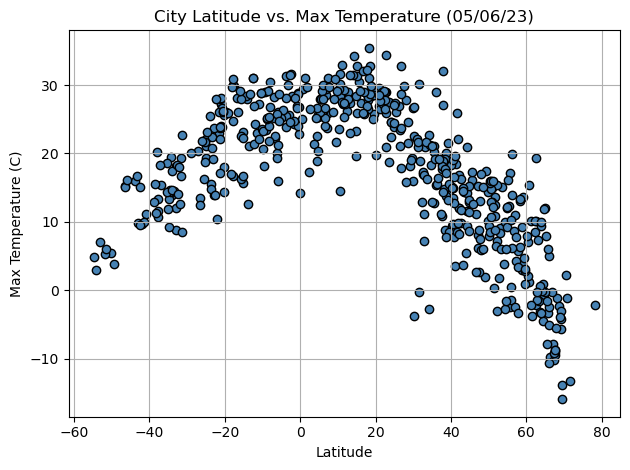

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("C:/Users/adolf/Downloads/Starter_Code/output_data/Fig1.png")

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

#### Latitude Vs. Humidity

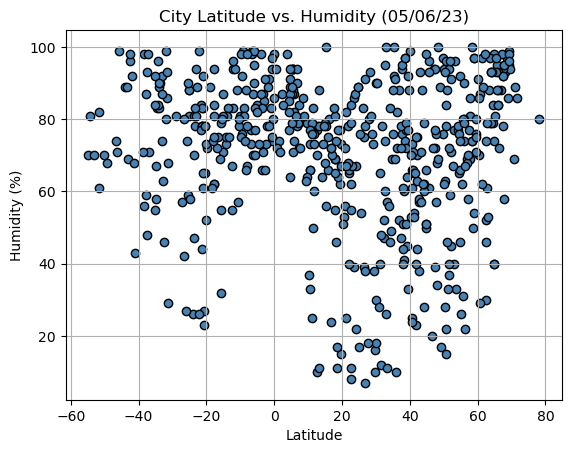

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], facecolor="steelblue", edgecolor="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("C:/Users/adolf/Downloads/Starter_Code/output_data/Fig2.png")

# Show plot
plt.grid()
plt.show()

#### Latitude Vs. Cloudiness

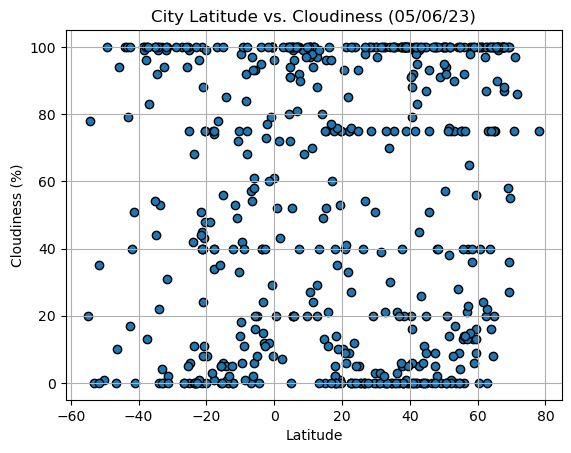

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/adolf/Downloads/Starter_Code/output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

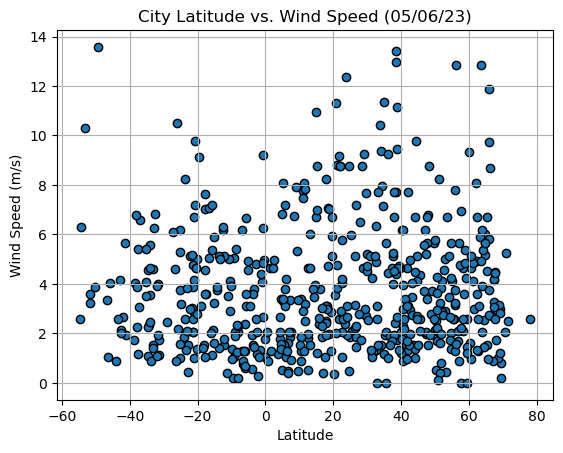

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], 
            city_data_df["Wind Speed"], 
            edgecolor="black", marker="o", 
            label="Cities")
# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("C:/Users/adolf/Downloads/Starter_Code/output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Create regression line data
    regress_values = x_values * slope + intercept
    
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,al ghayzah,16.2079,52.1760,27.42,80,100,3.78,YE,1683421022
2,sitka,57.0531,-135.3300,10.94,58,40,5.66,US,1683420534
3,longyearbyen,78.2186,15.6401,-2.09,80,75,2.57,SJ,1683421022
4,tommot,58.9564,126.2925,3.90,97,100,5.38,RU,1683421022
5,anadyr,64.7500,177.4833,-0.72,74,20,6.00,RU,1683421023


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,fale old settlement,-9.3852,-171.2468,28.96,76,6,5.05,TK,1683421022
6,port-aux-francais,-49.3500,70.2167,3.89,68,100,13.58,TF,1683421023
7,xai-xai,-25.0519,33.6442,19.38,88,0,3.74,MZ,1683421023
8,adamstown,-25.0660,-130.1015,22.17,81,99,5.30,PN,1683421023
11,el calafate,-50.3408,-72.2768,5.51,70,1,3.86,AR,1683421023


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7267617887278696


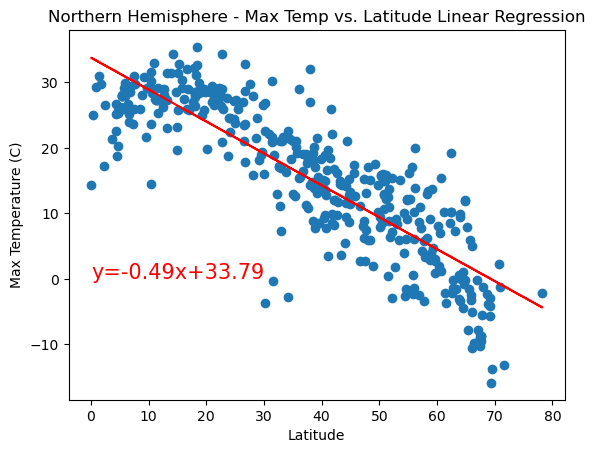

In [18]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.annotate(f'y={slope:.2f}x+{intercept:.2f}',(0,0),fontsize=15,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.604663158453395


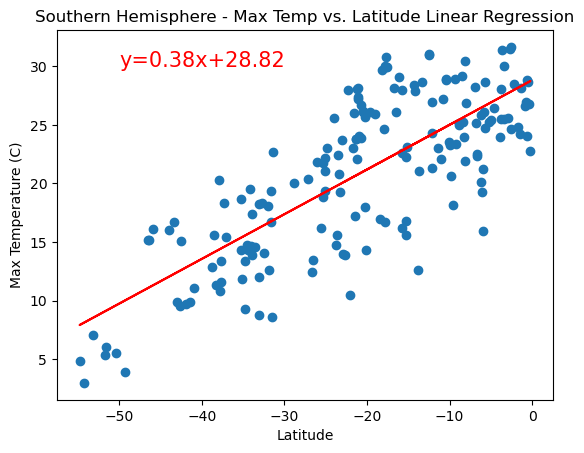

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.annotate(f'y={slope:.2f}x+{intercept:.2f}',(-50,30),fontsize=15,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere, there exists an inverse relationship between latitude and temperature, where temperature decreases as latitude increases. This pattern is anticipated due to the presence of winter in the northern regions and summer in the southern regions of the Northern Hemisphere.

Conversely, in the Southern Hemisphere, there is a direct relationship between latitude and temperature, meaning that temperature tends to increase as latitude increases. This correlation is expected due to the occurrence of summer in the northern areas and winter in the southern areas of the Southern Hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.008837383974746711


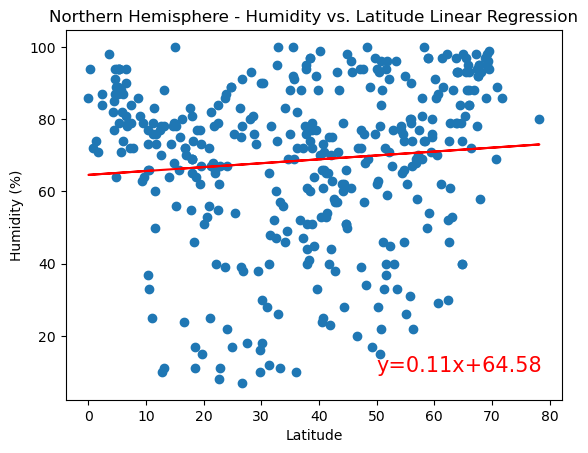

In [20]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.annotate(f'y={slope:.2f}x+{intercept:.2f}',(50,10),fontsize=15,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.018743201624144605


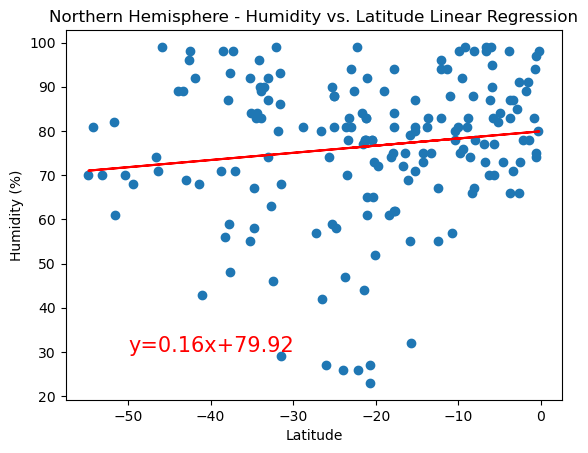

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.annotate(f'y={slope:.2f}x+{intercept:.2f}',(-50,30),fontsize=15,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** 
In the Northern Hemisphere's Humidity vs. Latitude plot, the results of the linear regression analysis revealed a weak positive correlation (r-value = 0.16). This indicates a slight inclination for humidity to increase as we move towards the North Pole. However, the data points are widely dispersed, suggesting that the relationship is not particularly strong.

On the other hand, in the Southern Hemisphere's Humidity vs. Latitude plot, the linear regression analysis indicated a very weak negative correlation (r-value = -0.07). This implies that there is no clear pattern between humidity and latitude. The scatter of data points is substantial and scattered, further indicating a lack of a strong relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0032775046196633823


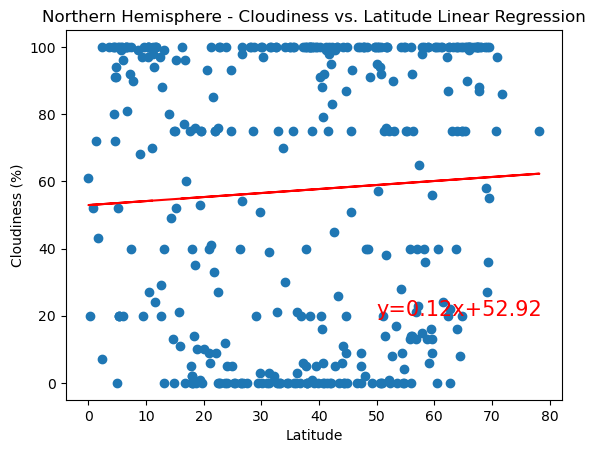

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.annotate(f'y={slope:.2f}x+{intercept:.2f}',(50,20),fontsize=15,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.007826330449710766


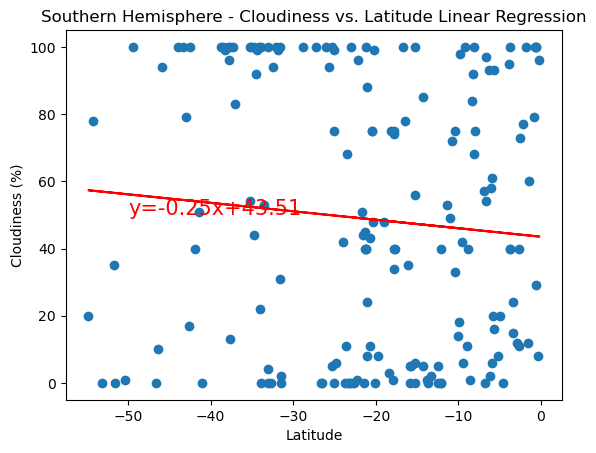

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.annotate(f'y={slope:.2f}x+{intercept:.2f}',(-50,50),fontsize=15,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** In both the Northern and Southern Hemispheres, there appears to be a limited linear association between cloudiness and latitude. The correlation coefficient (r-value) is significantly low in both instances, indicating a lack of substantial correlation between these variables. Moreover, the regression lines exhibit minimal slope, providing additional evidence for this finding. These observations suggest that latitude is not a robust predictor of cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0011321204964885444


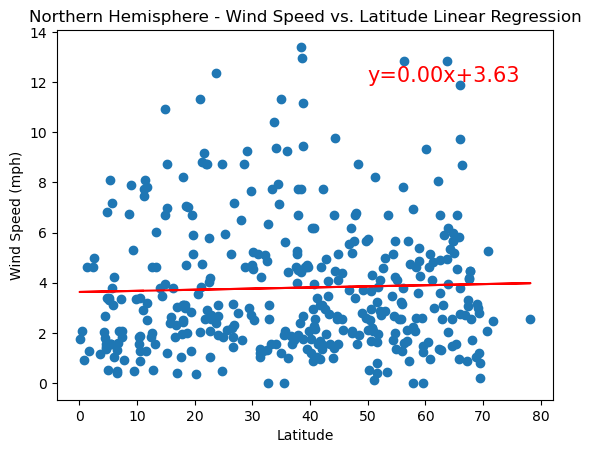

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.annotate(f'y={slope:.2f}x+{intercept:.2f}',(50,12),fontsize=15,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.024688463210626656


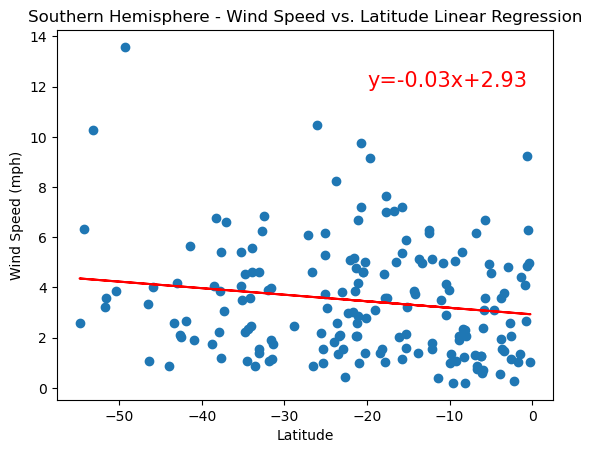

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Create Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.annotate(f'y={slope:.2f}x+{intercept:.2f}',(-20,12),fontsize=15,color="red")

# Print r square value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** In the Northern Hemisphere, the linear regression plot of Wind Speed vs. Latitude reveals a lack of strong correlation between the two variables, as indicated by an r-value of approximately -0.05. This suggests that there is no substantial relationship between latitude and wind speed in the Northern Hemisphere.

Similarly, in the Southern Hemisphere, the linear regression plot of Wind Speed vs. Latitude also demonstrates a lack of strong correlation, with an r-value of approximately -0.13. This implies a weak negative relationship between latitude and wind speed in the Southern Hemisphere, meaning that as latitude increases, wind speed slightly decreases. However, it is important to note that the correlation remains weak and statistically insignificant.